In [1]:
import cobra
import numpy as np
import pandas as panda
import matplotlib.pyplot as plt
model = cobra.io.read_sbml_model('/home/student/Downloads/new_thecaphora.xml')
model.reactions.BIOMASS.objective_coefficient=1
model


'' is not a valid SBML 'SId'.


Name,
Memory address,0x07f50d6bf2f70
Number of metabolites,2332
Number of reactions,3394
Number of groups,0
Objective expression,1.0*BIOMASS - 1.0*BIOMASS_reverse_69053
Compartments,"CYTOSOL, PERIPLASM, EXTRACELLULAR"


In [2]:
model.optimize()

,fluxes,reduced_costs
1-PHOSPHATIDYLINOSITOL-KINASE-RXN__var__0_c,0.0,-1.733059e-02
1.1.1.127-RXN_c,0.0,3.642919e-17
1.1.1.178-RXN_c,0.0,1.561251e-17
1.1.1.190-RXN_c,0.0,-1.733059e-02
1.1.1.210-RXN_c,0.0,1.561251e-17
...,...,...
TR_P-AMINO-BENZOATE_c_e,0.0,0.000000e+00
EX_P-AMINO-BENZOATE_e,0.0,0.000000e+00
TR_4-AMINO-4-DEOXYCHORISMATE_c_e,0.0,-0.000000e+00
EX_4-AMINO-4-DEOXYCHORISMATE_e,0.0,-2.599588e-02


In [3]:
model.reactions.__getattr__('ATPase').lower_bound= 60
model.optimize()
fva=cobra.flux_analysis.flux_variability_analysis(model, model.reactions[:3394])
fva.head()

,minimum,maximum
1-PHOSPHATIDYLINOSITOL-KINASE-RXN__var__0_c,0.0,4.058620e-13
1.1.1.127-RXN_c,0.0,0.000000e+00
1.1.1.178-RXN_c,0.0,0.000000e+00
1.1.1.190-RXN_c,0.0,0.000000e+00
1.1.1.210-RXN_c,0.0,0.000000e+00


In [4]:
eps= 2
namesN=list(fva.index)
minN=np.array(list(fva['minimum']))
maxN=np.array(list(fva['maximum']))
n=len(namesN)
#filtere Null Intervalle
names3=[]
minimum3=[]
maximum3=[]

for i in range(n):
    #if abs(minN[i]-maxN[i])>eps:
    if abs(minN[i])>eps and abs(maxN[i])>eps:
        if abs(maxN[i])<990 and abs(minN[i])<990:
          
    # if abs(minM[i])>eps:
            names3.append(namesN[i])
            minimum3.append(minN[i])
            maximum3.append(maxN[i])


d= panda.DataFrame()
d['names3']= names3
d['minimum3']= minimum3
d['maximum3']= maximum3
print(d)
len(names3)
model.reactions.__getattr__('ATPase').lower_bound= 0

                        names3  minimum3  maximum3
0           2PGADEHYDRAT-RXN_c      20.0      20.0
1            6PFRUCTPHOS-RXN_c      10.0      10.0
2               ATPSYN-RXN_c_p     -40.0     -40.0
3            F16ALDOLASE-RXN_c      10.0      10.0
4   HOMOCITRATE-SYNTHASE-RXN_c      20.0      20.0
5         KETOGLUTREDUCT-RXN_c      20.0      20.0
6              PEPDEPHOS-RXN_c      20.0      20.0
7            PHOSGLYPHOS-RXN_c     -20.0     -20.0
8               PYRUVDEH-RXN_c      20.0      20.0
9                  RXN-15513_c     -20.0     -20.0
10                 RXN-21282_c      20.0      20.0
11  TRIOSEPISOMERIZATION-RXN_c     -10.0     -10.0
12      RXN1YI0-15__var__0_c_p      40.0      40.0
13                  RXN-7970_c      20.0      20.0
14                 RXN-13722_c      20.0      20.0
15                      ATPase      60.0      60.0
16        TR_ALPHA-GLUCOSE_c_e     -10.0     -10.0
17      TR_OXYGEN-MOLECULE_c_e     -60.0     -60.0
18          EX_ALPHA-GLUCOSE_e 

In [8]:
lower_bound_liste = np.linspace(0,60,100)

for i in lower_bound_liste:
    model.reactions.__getattr__('ATPase').lower_bound = i
    model.optimize()
    print(model.reactions.BIOMASS.flux)
model.reactions.__getattr__('ATPase').lower_bound=0  
m = (0.005251693216259118-0.5199176284102954)/59.39393939
print(m)

0.5199176284102988
0.5146659351940321
0.5094142419777673
0.5041625487615017
0.4989108555452355
0.4936591623289682
0.48840746911270366
0.48315577589643904
0.47790408268017215
0.4726523894639076
0.46740069624763964
0.4621490030313761
0.4568973098151116
0.4516456165988448
0.4463939233825758
0.4411422301663125
0.4358905369500492
0.43063884373378347
0.4253871505175168
0.42013545730124996
0.4148837640849848
0.40963207086871967
0.40438037765245616
0.3991286844361893
0.3938769912199243
0.3886252980036572
0.38337360478739374
0.37812191157112834
0.3728702183548608
0.36761852513859644
0.3623668319223304
0.3571151387060669
0.35186344548979664
0.34661175227353047
0.3413600590572668
0.3361083658410005
0.33085667262473284
0.32560497940846866
0.3203532861922035
0.3151015929759367
0.30984989975967303
0.3045982065434059
0.2993465133271423
0.2940948201108733
0.2888431268946113
0.283591433678344
0.27833974046207877
0.27308804724581437
0.2678363540295479
0.2625846608132847
0.25733296759701846
0.25208127438

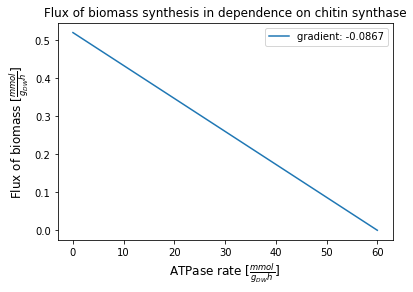

In [16]:
xs1 = lower_bound_liste
ys1 = []
for i in xs1:
    model.reactions.__getattr__('ATPase').lower_bound = i
    model.optimize()
    y1 = model.reactions.BIOMASS.flux
    ys1.append(y1)
model.reactions.__getattr__('ATPase').lower_bound=0
#new_xs=xs*-1
plt.title('Flux of biomass synthesis in dependence on chitin synthase')
plt.plot(xs1,ys1,label='gradient: -0.0867')
plt.legend(loc='upper right')
plt.xlabel(r'ATPase rate [$\frac{mmol }{g_{DW} h}$]',fontsize=12)
#plt.xlim(0,60)
plt.ylabel(r'Flux of biomass [$\frac{mmol }{g_{DW} h}$]',fontsize=12)
plt.savefig('/home/student/Documents/bachelorarbeit/thesis/Flux of biomass synthesis in dependence on Chitin-Synthase.pdf', bbox_inches="tight")
plt.show()

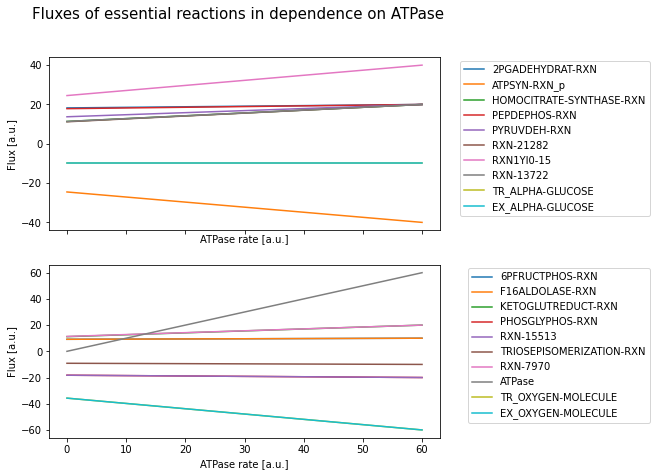

In [9]:
size= 2
fig, plots= plt.subplots(size,sharex=True, figsize=(7, 7))

for n, name in enumerate(names3):
    xs = lower_bound_liste
    ys = []
    for i in xs:
        model.reactions.__getattr__('ATPase').lower_bound = i
        model.optimize()
        y = model.reactions.__getattr__(name).flux
        ys.append(y)
    model.reactions.__getattr__('ATPase').lower_bound=0
    new_xs=xs*-1
    #plt.title('oxygen-dependent-flux of inevitable Reactions')
    name=name.replace('_c','')
    name=name.replace('_e','')
    name=name.replace('__var__0_p','')
    plots[n%size].plot(xs,ys,label=name)
        #plt.legend(loc='upper right')
plots[0].set_xlabel('ATPase rate [$\frac{mmol }{g_{DW} h}$]')
plots[1].set_xlabel('ATPase rate [$\frac{mmol }{g_{DW} h}$]')
#plots[0].xticks(False)
plots[0].set_ylabel('Flux [$\frac{mmol }{g_{DW} h}$]')
plots[1].set_ylabel('Flux [$\frac{mmol }{g_{DW} h}$]')
plots[0].legend(bbox_to_anchor =(1.15, 1, 0.4, 0.01))
plots[1].legend(bbox_to_anchor =(1.15, 1, 0.4, 0.01))
fig.suptitle('Fluxes of essential reactions in dependence on ATPase', fontsize=15)
fig.subplots_adjust(hspace=0.2)
#fig.tight_layout()
plt.savefig('/home/student/Documents/bachelorarbeit/thesis/ATPase-dependent-flux of essential Reactions.pdf', bbox_inches="tight")
plt.show()